# Random NSG generation

Code by Jacqueline Maasch | November 2024

## Preamble

In [1]:
# General importations.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import platform
import time
import warnings
import math

import networkx as nx

# View versioning.
print("python version     :", platform.python_version())
print("numpy version      :", np.__version__)
print("pandas version     :", pd.__version__)
print("matplotlib version :", matplotlib.__version__)
print("seaborn version    :", sns.__version__)
print("networkx version    :", nx.__version__)

python version     : 3.10.13
numpy version      : 1.26.3
pandas version     : 2.1.4
matplotlib version : 3.8.0
seaborn version    : 0.12.2
networkx version    : 3.4.2


## Define `RandomNSG` class

In [2]:
class RandomNSG:

    def get_nsg(self,
                n_per_bcc: list = [3,3,3], 
                bcc_types: list = ["cycle", "wheel", "cycle"],
                plot: bool = True) -> nx.classes.graph.Graph:
    
        '''
        Construct a necessary and sufficient subgraph (NSG) with exactly one
        root, exaclty one leaf, varying numbers of biconnected components (BCCs),
        and varying numbers of nodes in each BCC.
    
        Notes:
            1. n_per_bcc[i] >= 2.
            2. If n_per_bcc[i] == 2, bcc[i] will be a bridge.
            3. len(n_per_bcc) must equal len(bcc_types).
    
        Return: networkx digraph
        '''
    
        if len(n_per_bcc) != len(bcc_types):
            raise Exception("len(n_per_bcc) must be equal to len(bcc_types).")
    
        # Construct first BCC.
        if bcc_types[0] == "cycle":
            nsg = nx.cycle_graph(n = n_per_bcc[0])
        elif bcc_types[0] == "wheel":
            nsg = nx.wheel_graph(n = n_per_bcc[0])
        adj = nx.to_numpy_array(nsg)
    
        # Convert adjacency matrix to upper triangular to get DAG.
        adj = np.triu(adj)
        nsg = nx.from_numpy_array(adj) 
    
        # Get leaf.
        row_sums = adj.sum(axis = 1)
        leaf_idx = np.where(row_sums == 0)[0]
    
        # Add remaining BCCs.
        bccs = []
        for i in range(1,len(n_per_bcc)):
    
            if bcc_types[i] == "cycle":
                g = nx.cycle_graph(n = n_per_bcc[i])
            elif bcc_types[i] == "wheel":
                g = nx.wheel_graph(n = n_per_bcc[i])
    
            adj = nx.to_numpy_array(g)
            adj = np.triu(adj)
            g = nx.from_numpy_array(adj) 
            g = nx.relabel_nodes(g, dict(zip(list(g.nodes), [x+(len(nsg.nodes)-1) for x in g.nodes])))
            
            nsg = nx.relabel_nodes(nsg, { n: str(n) if n==leaf_idx else 'a-'+str(n) for n in nsg.nodes })
            g = nx.relabel_nodes(g, { n: str(n) if n==leaf_idx else 'b-'+str(n) for n in g.nodes })
            
            nsg = nx.compose(nsg,g)
            adj = nx.to_numpy_array(nsg)
            adj = np.triu(adj)
            
            nsg = nx.relabel_nodes(nsg, dict(zip(list(nsg.nodes), range(len(nsg.nodes)))))
            row_sums = adj.sum(axis = 1)
            leaf_idx = np.where(row_sums == 0)[0]
    
        # Relabel nodes and cast as DiGraph.
        nsg = nx.relabel_nodes(nsg, dict(zip(nsg.nodes,range(len(nsg.nodes)))))
        nsg = nsg.to_directed(as_view = False)
    
        if plot:
            plot_nx(adj, 
                    labels = list(nsg.nodes), 
                    figsize = (7,7), 
                    dpi = 50, 
                    node_size = 1500,
                    arrow_size = 20)
            
        return nsg

In [3]:
def plot_nx(adjacency_matrix,
            labels,
            figsize = (10,10),
            dpi = 200,
            node_size = 800,
            arrow_size = 10):

    '''
    Plot graph in networkx from adjacency matrix.
    '''
    
    g = nx.from_numpy_array(adjacency_matrix, create_using = nx.DiGraph)
    plt.figure(figsize = figsize, dpi = dpi)  
    nx.draw_circular(g, 
                     node_size = node_size, 
                     labels = dict(zip(list(range(len(labels))), labels)), 
                     arrowsize = arrow_size,
                     node_color = "pink",
                     with_labels = True)
    plt.show()
    plt.close()

## Manual design

https://stackoverflow.com/questions/49427320/joining-two-networkx-graphs-on-a-single-edge

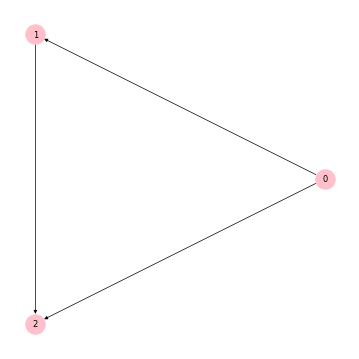

In [4]:
g = nx.wheel_graph(n = 3)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

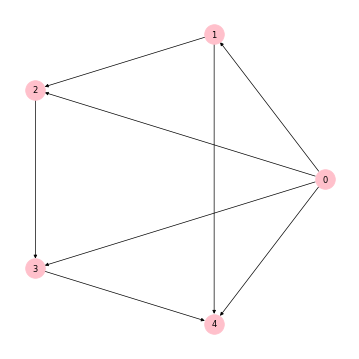

In [5]:
g = nx.wheel_graph(n = 5)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

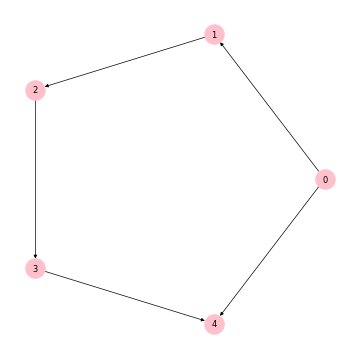

In [6]:
g = nx.cycle_graph(n = 5)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

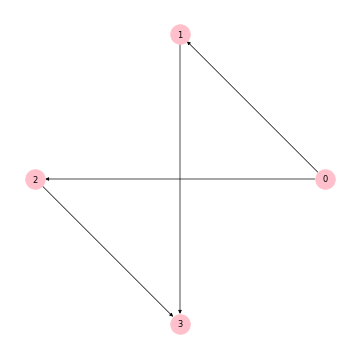

In [7]:
g = nx.hypercube_graph(n = 2)
adj = nx.to_numpy_array(g)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

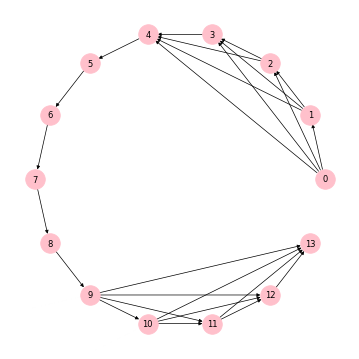

In [8]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html
barbell = nx.barbell_graph(5, 4)
adj = nx.to_numpy_array(barbell)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

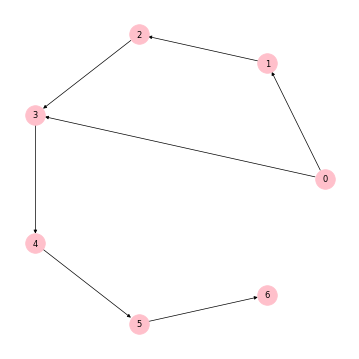

In [9]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.classic.tadpole_graph.html
tadpole = nx.tadpole_graph(m = 4, n = 3)
adj = nx.to_numpy_array(tadpole)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)

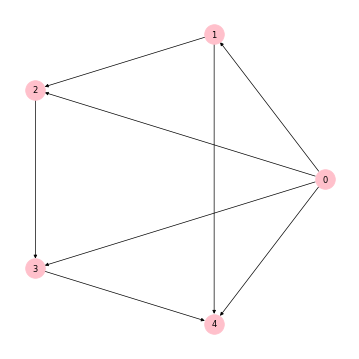

In [10]:
# https://networkx.org/documentation/stable/reference/generated/networkx.generators.expanders.chordal_cycle_graph.html
wheel = nx.wheel_graph(n = 5)
adj = nx.to_numpy_array(wheel)
adj = np.triu(adj)
plot_nx(adj, labels = list(range(adj.shape[0])), figsize = (7,7), dpi = 50)
row_sums = adj.sum(axis = 1)
leaf_idx = np.where(row_sums == 0)[0]

## Automated design

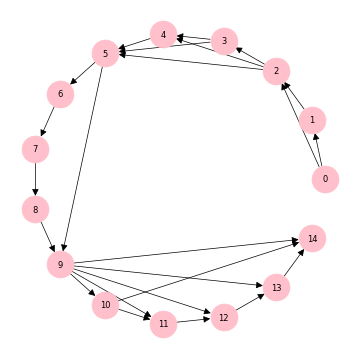

In [11]:
rand = RandomNSG()
nsg = rand.get_nsg(n_per_bcc = [3,4,5,6],
                   bcc_types = ["cycle", "wheel", "cycle", "wheel"])

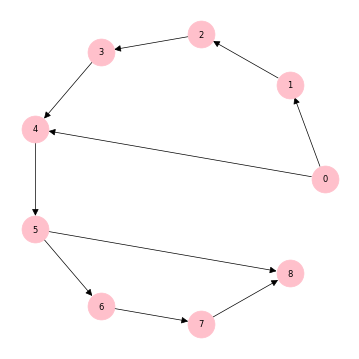

In [12]:
nsg = rand.get_nsg(n_per_bcc = [5,2,4])

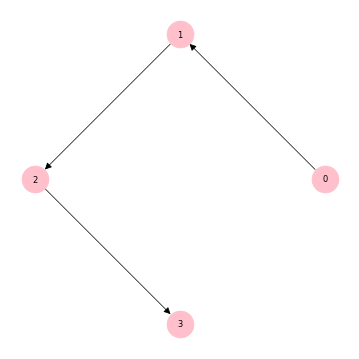

In [13]:
nsg = rand.get_nsg(n_per_bcc = [2,2,2], 
                   bcc_types = ["cycle", "cycle", "cycle"])

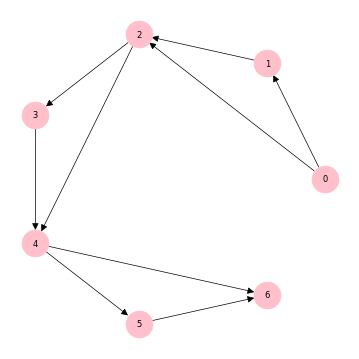

In [14]:
nsg = rand.get_nsg(n_per_bcc = [3,3,3], 
                   bcc_types = ["cycle", "cycle", "cycle"])

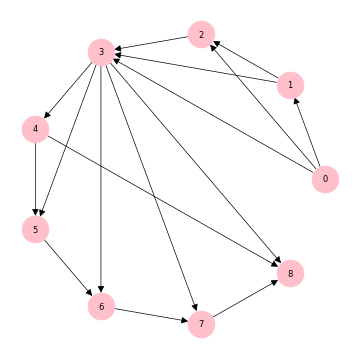

In [15]:
nsg = rand.get_nsg(n_per_bcc = [4,6], 
                   bcc_types = ["wheel", "wheel"])

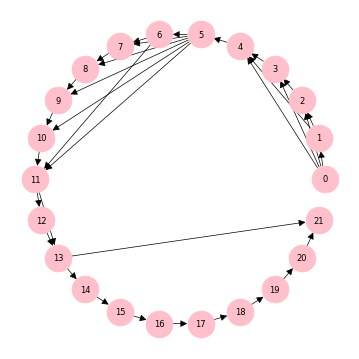

In [16]:
nsg = rand.get_nsg(n_per_bcc = [5,2,7,3,9], 
                   bcc_types = ["wheel", "cycle", "wheel", "cycle", "cycle"])

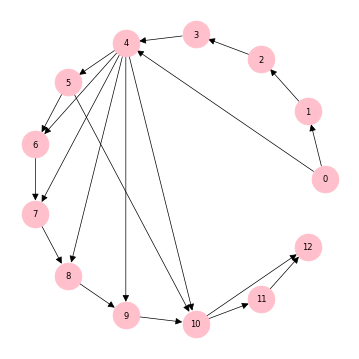

In [17]:
nsg = rand.get_nsg(n_per_bcc = [5,7,3])

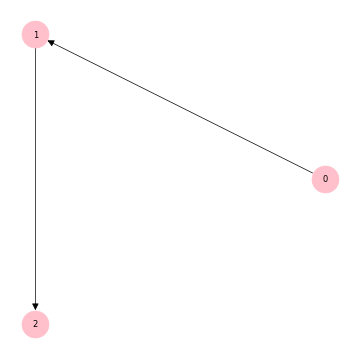

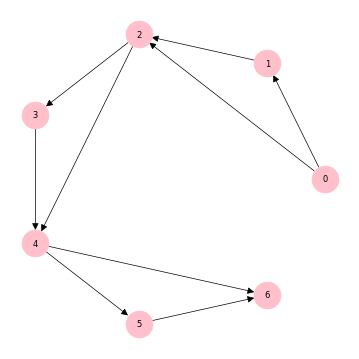

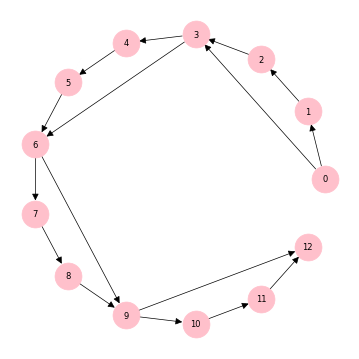

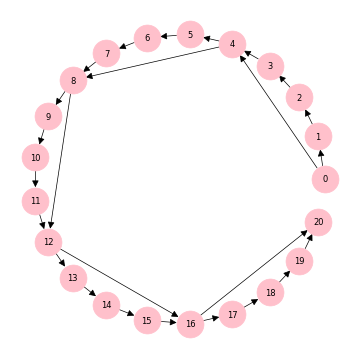

In [18]:
sizes_list = [[2,2],[3,3,3],[4,4,4,4],[5,5,5,5,5]]
for sizes in sizes_list:
    nsg = rand.get_nsg(n_per_bcc = sizes,
                       bcc_types = ["cycle"]*len(sizes))

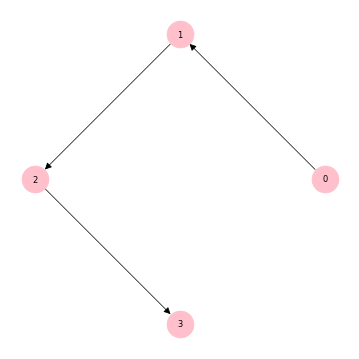

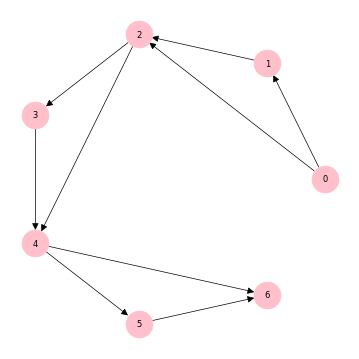

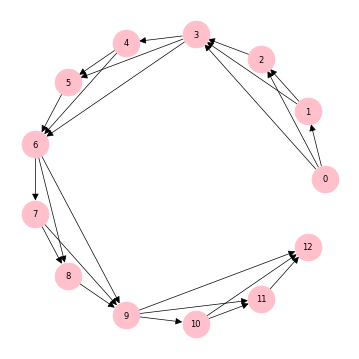

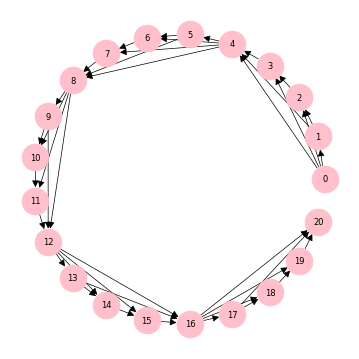

In [19]:
sizes_list = [[2,2,2],[3,3,3],[4,4,4,4],[5,5,5,5,5]]
for sizes in sizes_list:
    nsg = rand.get_nsg(n_per_bcc = sizes,
                       bcc_types = ["wheel"]*len(sizes))

## End of document